# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df_dogs=pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', na_values=['Unknown', 'UNKNOWN'])
df_dogs.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [3]:
df_dogs=pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values=['Unknown', 'UNKNOWN'])


In [4]:
df_dogs.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
#Each row represents the license information of a dog in NYC
#Owner Zip Code refer to the zipcode that specific dog is licensed in
#Primary Breed gives the dog's primary breed

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [6]:
#Number of licensed dogs in each zipcode
#Popular breeds by zipcode
#most popular names by breed
#most popular age of licensed dogs in NYC

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
df_dogs['Primary Breed'].value_counts()

Yorkshire Terrier            1882
Shih Tzu                     1760
Chihuahua                    1535
Maltese                      1133
Labrador Retriever           1074
                             ... 
Smooth Fox Terrier              1
Lancashire Heeler               1
French Spaniel                  1
Kooikerhondje                   1
German Longhaired Pointer       1
Name: Primary Breed, Length: 250, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [8]:
df_dogs['Primary Breed'].value_counts()

Yorkshire Terrier            1882
Shih Tzu                     1760
Chihuahua                    1535
Maltese                      1133
Labrador Retriever           1074
                             ... 
Smooth Fox Terrier              1
Lancashire Heeler               1
French Spaniel                  1
Kooikerhondje                   1
German Longhaired Pointer       1
Name: Primary Breed, Length: 250, dtype: int64

<AxesSubplot:>

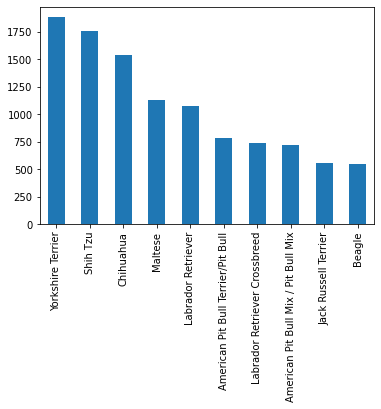

In [9]:
df_dogs['Primary Breed'].value_counts().head(10).plot(kind='bar')

## What are the most popular dog names?

In [10]:
df_dogs['Animal Name'].value_counts()

Max              202
Bella            193
Charlie          172
Lola             146
Rocky            140
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: Animal Name, Length: 13719, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
len(df_dogs[df_dogs["Animal Name"].str.contains("Max", na=False)])


377

In [12]:
len(df_dogs[df_dogs["Animal Name"].str.contains("Maxwell", na=False)])

20

## What percentage of dogs are guard dogs?

In [13]:
df_dogs.columns=df_dogs.columns.str.lower().str.replace(" ", "_")
df_dogs.columns
#I got annoyed at all my spelling errors at this point)

Index(['owner_zip_code', 'animal_name', 'animal_gender', 'primary_breed',
       'secondary_breed', 'animal_dominant_color', 'animal_secondary_color',
       'animal_third_color', 'animal_birth', 'spayed_or_neut',
       'guard_or_trained', 'vaccinated', 'application_date',
       'license_issued_date', 'license_expired_date'],
      dtype='object')

In [14]:
df_dogs.guard_or_trained.value_counts(normalize=True)*100

No     99.914254
Yes     0.085746
Name: guard_or_trained, dtype: float64

## What are the actual numbers?

In [15]:
df_dogs.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [16]:
df_dogs.guard_or_trained.value_counts().sum()

19826

In [17]:
df_dogs.guard_or_trained.isna().sum()

10174

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [18]:
df_dogs.guard_or_trained.value_counts(dropna=False)
#wouldn't filling in with 'No' be false data? 

No     19809
NaN    10174
Yes       17
Name: guard_or_trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [19]:
#df_dogs.groupby(by='guard_or_trained').primary_breed.value_counts().groupby(level=0).head(1)
df_dogs.groupby(by='guard_or_trained').primary_breed.value_counts().groupby(level=0, group_keys='false').nlargest(2)

guard_or_trained  guard_or_trained  primary_breed      
No                No                Yorkshire Terrier      1199
                                    Shih Tzu               1135
Yes               Yes               German Shepherd Dog       3
                                    Doberman Pinscher         1
Name: primary_breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [20]:
df_dogs['year']=df_dogs['animal_birth'].apply(lambda birth: birth.year)
df_dogs

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [21]:
df_dogs['age']=2020-df_dogs.year
df_dogs

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,10
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,10
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,6
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,11


In [22]:
df_dogs.age.mean().round(0)

11.0

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [23]:
df_zips=pd.read_csv('zipcodes-neighborhoods.csv')
df_zips

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [24]:
dogs_zips=df_dogs.merge(df_zips, left_on='owner_zip_code', right_on='zip', how='left')
dogs_zips

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,10013.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,10,West Queens,11372.0,Queens
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,10,Southwest Queens,11417.0,Queens
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,6,Southwest Brooklyn,11228.0,Brooklyn
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,11,Northwest Brooklyn,11217.0,Brooklyn


In [25]:
dogs_zips.shape

(30000, 20)

In [26]:
dogs_zips=dogs_zips.drop(columns=['zip'])
#dogs_zips=dogs_zips.pop('borough')
dogs_zips

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,10,West Queens,Queens
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,10,Southwest Queens,Queens
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,6,Southwest Brooklyn,Brooklyn
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,11,Northwest Brooklyn,Brooklyn


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [27]:
dogs_zips[dogs_zips.borough=='Bronx'].animal_name.value_counts().head(5)

Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: animal_name, dtype: int64

In [28]:
dogs_zips[dogs_zips.borough=='Brooklyn'].animal_name.value_counts().head(5)

Max        46
unknown    45
Bella      45
Charlie    42
Rocky      36
Name: animal_name, dtype: int64

In [29]:
dogs_zips[dogs_zips.neighborhood=='Upper East Side'].animal_name.value_counts().head(5)

Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: animal_name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [71]:
pop_neighborhood=dogs_zips.groupby('neighborhood').primary_breed.value_counts().groupby(level=0).head(5)

In [75]:
pd.set_option("display.max_rows", None)
pop_neighborhood

neighborhood                   primary_breed                       
Borough Park                   Yorkshire Terrier                        49
                               Maltese                                  34
                               Shih Tzu                                 34
                               Chihuahua                                32
                               Labrador Retriever                       19
Bronx Park and Fordham         Yorkshire Terrier                        39
                               Shih Tzu                                 33
                               Chihuahua                                30
                               American Pit Bull Terrier/Pit Bull       24
                               Maltese                                  18
Bushwick and Williamsburg      Yorkshire Terrier                        47
                               Chihuahua                                40
                               S

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [31]:
#df_dogs[df_dogs.spayed_or_neut=='Yes'].groupby('animal_gender').plot(kind='bar')
df_dogs.groupby('animal_gender').head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,7
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,6
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,8
10,10028,Lola,F,Maltese,NaN,Apricot,White,NaN,2009-06-01,Yes,No,Yes,2014-09-12 22:07:33.697,2014-09-12,2017-10-09,2009,11
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13,2013,7


In [32]:
df_dogs[df_dogs.spayed_or_neut=='Yes'].animal_gender.value_counts().groupby(level=0).head()

M    12874
F    11786
         3
Name: animal_gender, dtype: int64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [33]:
dogs_zips.animal_dominant_color=dogs_zips.animal_dominant_color.str.upper()
dogs_zips.animal_secondary_color=dogs_zips.animal_secondary_color.str.upper()
dogs_zips.animal_third_color=dogs_zips.animal_third_color.str.upper()

In [126]:
#dogs_zips.loc[[],['animal_dominant_color', 'animal_secondary_color','animal_third_color']=='BLACK']

#HALP, I"M TUCK!




## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

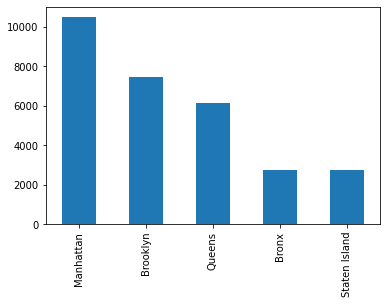

In [35]:
dogs_zips.borough.value_counts().plot(kind='bar')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [36]:
boro_pop=pd.read_csv('boro_population.csv')
boro_pop.head(5)

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [37]:
dogs_zips_boros=dogs_zips.merge(boro_pop, left_on='borough', right_on='borough', how='left')
dogs_zips_boros.head(5)


,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,...,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13,Upper West Side,Manhattan,1644518.0,23.0
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7,Southeast Bronx,Bronx,1455444.0,42.0
2,10013,Bilal,M,Australian Cattledog,NaN,RUST,NaN,NaN,2014-09-01,Yes,...,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan,1644518.0,23.0
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12,Upper West Side,Manhattan,1644518.0,23.0
4,10013,Ali,M,Basenji,NaN,BLACK,NaN,NaN,2014-01-01,No,...,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan,1644518.0,23.0


In [51]:
total_boro=dogs_zips.borough.value_counts()
#dogs_zips_boros[dogs_zips_boros.groupby('borough').population.value_counts()

total_pop=dogs_zips_boros.groupby(by='borough').population.sum()



In [59]:
#pd.set_option('display.float_format', lambda x: '%.10f' % x)
pd.reset_option('display.float_format')
total_boro/total_pop*100

Bronx            0.000069
Brooklyn         0.000038
Manhattan        0.000061
Queens           0.000043
Staten Island    0.000211
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:xlabel='borough,primary_breed'>

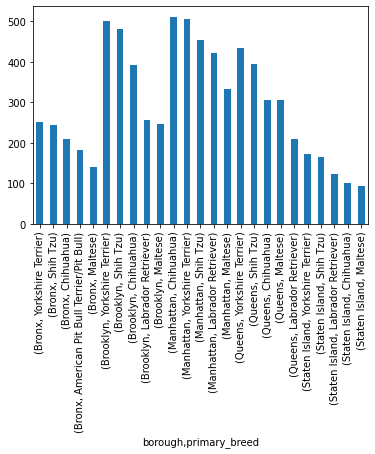

In [125]:
top_boro=dogs_zips.groupby('borough').primary_breed.value_counts().groupby(level=0).head(5)
#groupby(level=0).head(5).plot(kind='barh', figsize=[10,10])
top_boro.plot(x="borough", y="primary_breed", kind="bar")

In [ ]:
#Could not figure out how to group my results into coloured columns to show
#Borough as x, value counts as y and grouped coloured columns as breeds